<a href="https://colab.research.google.com/github/Paulina99Sadowska/Artificial_Intelligence/blob/main/ANN_for_classification_and_binary_dependent_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

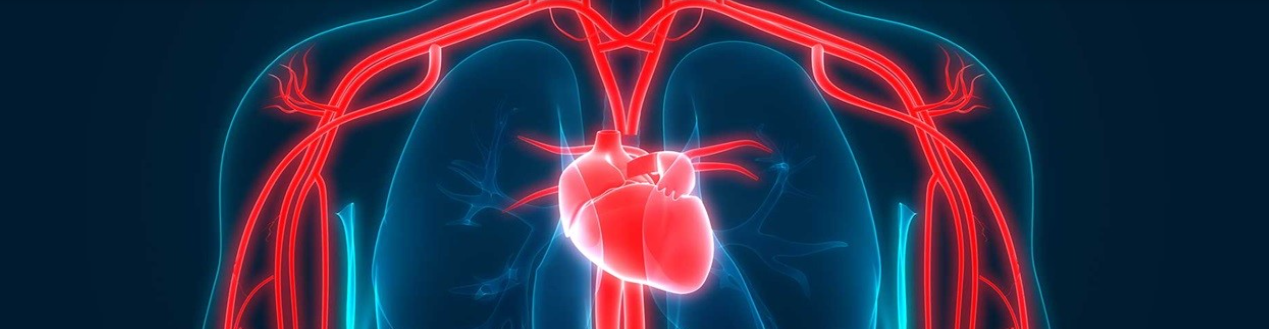

#**Artificial Neural Network for classification and binary dependent variable**

### Importing the libraries

In [213]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the dataset

In [214]:
dt = pd.read_csv('heart.csv')
X = dt.iloc[:,:-1].values
y = dt.iloc[:,-1].values


### Encoding categorical data

Label Encoding

In [215]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Sex (M - 1, K - 0)
X[:,1] = le.fit_transform(X[:,1])
# ExerciseAngina (Y - 1, N - 0)
X[:,8] = le.fit_transform(X[:,8])

pd.DataFrame(X)





,0,1,2,3,4,5,6,7,8,9,10
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat


One Hot Encoding

In [216]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [15])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

#ChestPainType( ASY-6, ATA - 7, NAP-8, TA-9)
#RestingECG: resting electrocardiogram results [LVH - 3, Normal - 4, ST - 5]
#ST_Slope: the slope of the peak exercise ST segment [Up - 2, Flat - 1, Down - 0]
pd.DataFrame(X)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,40,1,140,289,0,172,0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,0,160,180,0,156,0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,37,1,130,283,0,98,0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48,0,138,214,0,108,1,1.5
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54,1,150,195,0,122,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,45,1,110,264,0,132,0,1.2
914,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,68,1,144,193,1,141,0,3.4
915,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,57,1,130,131,0,115,1,1.2
916,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,57,0,130,236,0,174,0,0.0


### Splitting the dataset into the Training set and Test set

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [218]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [219]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [220]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [221]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [222]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [223]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [224]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 2s 4ms/step - loss: 0.7089 - accuracy: 0.6281
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.6635
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6697 - accuracy: 0.6839
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.7057
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6206 - accuracy: 0.7248
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.7411
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5511 - accuracy: 0.7766
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.8025
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.8188
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.8243
Epoch 11/

Accuracy for the train set is 0.91, which means that out of 100 observations we have about 91 correct predictions. This means that the created model is very good

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix

In [226]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[53 24]
 [ 8 99]]


0.8260869565217391

### Predicting the result of a single

#Case Study

Medical Problem Description: Heart Disease Detection in Patient

**Patient**:

1. Age: 45 years
2. Gender: Male

**Available Data and Test Results:**

1. Chest Pain Type: TA (Typical Angina)
2. Resting Blood Pressure: 130 mm Hg
3. Serum Cholesterol Level: 210 mm/dl
4. Fasting Blood Sugar Level: 0
5. Resting ECG Result: ST
6. Maximum Heart Rate Achieved: 160
7. Exercise-Induced Angina: No (N)
8. ST Depression (Oldpeak)
9. ST Slope: Flat

**The program enables you to substitute various values to determine whether a particular patient might be at risk of experiencing a heart attack**


In [245]:
pacjent_1 = {
    'Age': 55,
    'Sex': 'F',
    'ChestPainType': 'ASY',
    'RestingBP': 128,
    'Cholesterol': 205,
    'FastingBS': 0,
    'RestingECG': 'ST',
    'MaxHR': 130,
    'ExerciseAngina': 'Y',
    'Oldpeak': 2,
    'ST_Slope': 'Flat',
}

zero_vector = np.zeros(18)
values_vector = np.array(list(pacjent_1.values()))

if values_vector[1] == 'M':
  values_vector[1]=1
else:
  values_vector[1] = 0

if values_vector[8] == 'Y':
  values_vector[8]= 1
else:
  values_vector[8] = 0

chestpaintype = ['ASY', 'ATA', 'NAP', 'TA']
for i in range(0,4):
  if values_vector[2] == chestpaintype[i]:
    zero_vector[i+6]=1

restingecg = ['LVH', 'Normal', 'ST']
for i in range(0,3):
  if values_vector[6] == restingecg[i]:
    zero_vector[i+3]=1

st_slope = ['Up', 'Flat', 'Down']
for i in range(0,3):
  if values_vector[10] == st_slope[i]:
    zero_vector[i]=1

values_vector = np.delete(values_vector, 2)
values_vector = np.delete(values_vector, 5)
values_vector = np.delete(values_vector, -1)

for i in range(0,len(values_vector)):
  zero_vector[i+10] = values_vector[i]


if ann.predict(sc.transform([zero_vector])) > 0.5:
   print('Heart disease')
else:
  print('Normal')



1/1 [==============================] - 0s 45ms/step
Heart disease
